In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import sys
sys.path.append("/home/ubuntu/Notebooks/annsa/")

import tensorflow.contrib.eager as tfe
from sklearn import datasets, preprocessing, model_selection

import annsa as an
import tensorflow as tf
import numpy as np

/home/ubuntu/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.enable_eager_execution()

#### Define neural network

In [3]:
from cvt_oct_tensorflow_classes import cnn
from cvt_oct_tensorflow_classes import cnn_model_features
from cvt_oct_tensorflow_classes import class_isotopes

#### Get some data

In [4]:
scaler=preprocessing.StandardScaler()
mlb=preprocessing.MultiLabelBinarizer()

In [5]:
training_data = np.load('CVT-oct-spectra-test.npy')
training_keys = np.load('CVT-oct-keys-test.npy')
nan_isotopes=list(set(np.argwhere(np.isnan(training_data))[:,0]))
training_data=np.delete(training_data,nan_isotopes,axis=0)
training_keys=np.delete(training_keys,nan_isotopes,axis=0)

training_data = scaler.fit_transform(training_data)
training_keys_binarized = mlb.fit_transform(training_keys.reshape([training_data.shape[0],1]))



X_tensor = tf.constant(training_data)
y_tensor = tf.constant(training_keys_binarized)

train_dataset = tf.data.Dataset.from_tensor_slices((X_tensor, y_tensor))

In [6]:
X_tensor = tf.constant(training_data[0:100])
y_tensor = tf.constant(training_keys_binarized[0:100])

test_dataset = (training_data[0:100], training_keys_binarized[0:100])

#### Define an optimizer, model, and train the network

In [7]:
new_model_features = cnn_model_features(learining_rate=4.5e-3,
                                    l2_regularization_scale=1.09e-3,
                                    dropout_probability=1.0-0.96,
                                    nodes_layer_1=449,
                                    nodes_layer_2=205)

In [8]:
optimizer = tf.train.AdamOptimizer(new_model_features.learining_rate)
model = cnn(new_model_features)

In [10]:
all_loss_train, all_loss_test = model.fit_batch(train_dataset,test_dataset, optimizer, num_epochs=10, verbose=1)

Loss at epoch 1: 2.51 2.63
Loss at epoch 2: 2.22 2.47
Loss at epoch 3: 2.08 2.05
Loss at epoch 4: 1.90 2.03
Loss at epoch 5: 1.86 1.97
Loss at epoch 6: 1.69 1.86
Loss at epoch 7: 1.73 1.67
Loss at epoch 8: 1.64 1.93
Loss at epoch 9: 1.42 1.57
Loss at epoch 10: 1.33 1.60


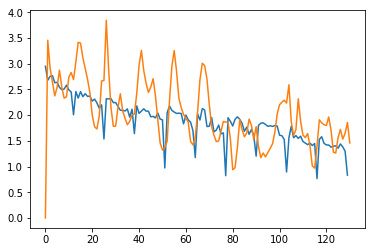

In [11]:
plt.plot(all_loss_train[0:])
plt.plot(all_loss_test[0:])
#plt.xlim([0,500])
#plt.ylim([2.9,3.0])

#### Check outputs

Pred label: Pu239
True label: Pu240


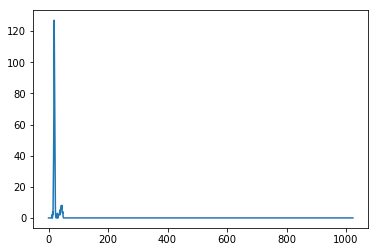

In [16]:
index = 4017


#logits_test = model.predict(training_data[index])
logits_test=tf.nn.softmax(model.predict_logits(training_data[index]))
print 'Pred label: '+class_isotopes[np.argmax(logits_test)]
print 'True label: '+class_isotopes[training_keys[index]]

plt.plot(scaler.inverse_transform(training_data[index]))

#an.results2(training_keys_binarized[index],5)
#print '\n'
#an.results2(logits_test.numpy()[0][0],5)

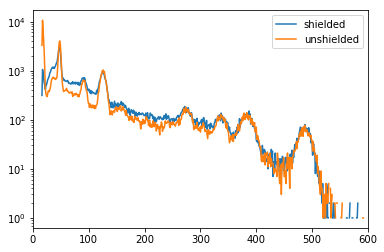

In [18]:
spectrum1=an.read_spectrum('/home/ubuntu/Notebooks/Shielded_Data/Eu152_15cm_88.5s_25.5mmSS_2.Spe')
spectrum2=an.read_spectrum('/home/ubuntu/Notebooks/Shielded_Data/Eu152_15cm_60s_0.Spe')

plt.plot(spectrum1,label='shielded')
plt.semilogy(spectrum2,label='unshielded')
plt.xlim([0,600])
plt.legend()

In [19]:
spectrum=scaler.transform(spectrum1.reshape([1,1024]))
logits_test=tf.nn.softmax(model.predict_logits(spectrum[0]))
print class_isotopes[np.argmax(logits_test)]

spectrum=scaler.transform(spectrum2.reshape([1,1024]))
logits_test=tf.nn.softmax(model.predict_logits(spectrum[0]))
print class_isotopes[np.argmax(logits_test)]

shileded_Co60
shileded_Co60


In [ ]:
Eu152_0mmlead_30cm_60s.Spe
Eu152_0mmlead_55cm_60s.Spe
Eu152_227mmlead_30cm_60s.Spe
Eu152_255mmSS_30cm_60s.Spe
Eu152_500s000.Spe
Eu152_516mmlead_30cm_60s.Spe
Eu152_51mmSS_30cm_60s.Spe
Eu152_6.4mmlead_55cm_60s.Spe
Eu152_64mmlead_30cm_60s.Spe
Eu_10sDECAYTEST000.Spe
Eu_10sDECAYTEST001.Spe
Eu_60sDECAYTEST000.Spe

In [ ]:
spectrum=an.read_spectrum('/home/ubuntu/Notebooks/Eu_60sDECAYTEST000.Spe')
plt.plot(spectrum)
spectrum=scaler.transform(spectrum.reshape([1,1024]))

logits_test = model.predict(spectrum[0])
print class_isotopes[np.argmax(logits_test)]